# Bayesian Regression

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
boston = datasets.load_boston()
X = boston['data']
y = boston['target']

The `BayesianRegression` class estimates the regression coefficients using 

$$
\left(\frac{1}{\sigma^2}\bX^\top\bX + \frac{1}{\tau} I\right)^{-1}\frac{1}{\sigma^2}\bX^\top\by.
$$

Note that this assumes $\sigma^2$ and $\tau$ are known. We can determine the influence of the prior distribution by manipulationg $\tau$, though there are principled ways to choose $\tau$. There are also principled Bayesian methods to model $\sigma^2$ (see [here](https://www.statlect.com/fundamentals-of-statistics/Bayesian-regression)), though for simplicity we will estimate it with the typical OLS estimate:

$$
\hat{\sigma}^2 = \frac{SSE}{N - (D + 1)},
$$

where $SSE$ is the sum of squared errors from an ordinary linear regression, $N$ is the number of observations, and $D$ is the number of predictors. Using the linear regression model from chapter 1, this comes out to about 11.8.

In [2]:
class BayesianRegression:
    
    def fit(self, X, y, sigma_squared, tau, add_intercept = True):
        
        # record info
        if add_intercept:
            ones = np.ones(len(X)).reshape((len(X),1))
            X = np.append(ones, np.array(X), axis = 1)
        self.X = X
        self.y = y
        
        # fit
        XtX = np.dot(X.T, X)/sigma_squared
        I = np.eye(X.shape[1])/tau
        inverse = np.linalg.inv(XtX + I)
        Xty = np.dot(X.T, y)/sigma_squared
        self.beta_hats = np.dot(inverse , Xty)
        
        # fitted values
        self.y_hat = np.dot(X, self.beta_hats)
        
        

Let's fit a Bayesian regression model on the {doc}`Boston housing </content/appendix/data>` dataset. We'll use $\sigma^2 = 11.8$ and $\tau = 10$. 

In [3]:
sigma_squared = 11.8
tau = 10
model = BayesianRegression()
model.fit(X, y, sigma_squared, tau)

The below plot shows the estimated coefficients for varying levels of $\tau$. A lower value of $\tau$ indicates a stronger prior, and therefore a greater pull of the coefficients towards their expected value (in this case, 0). As expected, the estimates approach 0 as $\tau$ decreases.

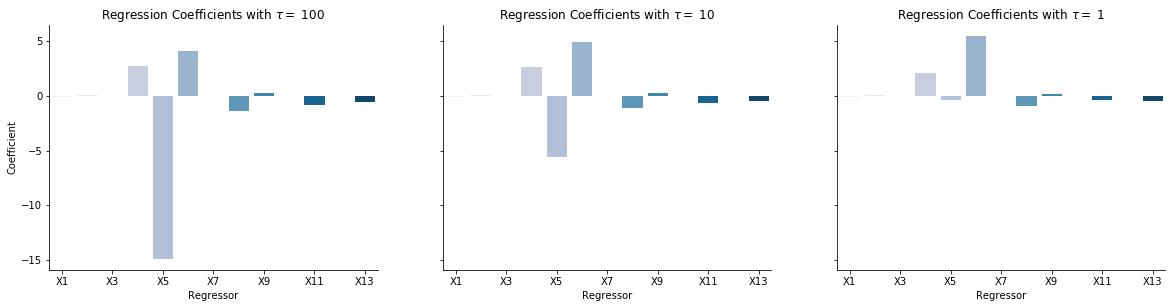

In [4]:
Xs = ['X'+str(i + 1) for i in range(X.shape[1])]
taus = [100, 10, 1]

fig, ax = plt.subplots(ncols = len(taus), figsize = (20, 4.5), sharey = True)
for i, tau in enumerate(taus):
    model = BayesianRegression()
    model.fit(X, y, sigma_squared, tau) 
    betas = model.beta_hats[1:]
    sns.barplot(Xs, betas, ax = ax[i], palette = 'PuBu')
    ax[i].set(xlabel = 'Regressor', title = fr'Regression Coefficients with $\tau = $ {tau}')
    ax[i].set(xticks = np.arange(0, len(Xs), 2), xticklabels = Xs[::2])

ax[0].set(ylabel = 'Coefficient')
sns.set_context("talk")
sns.despine();